In [83]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/urbansound8k/UrbanSound8K.csv
/kaggle/input/urbansound8k/fold7/164797-2-0-8.wav
/kaggle/input/urbansound8k/fold7/177537-7-2-0.wav
/kaggle/input/urbansound8k/fold7/177729-0-0-68.wav
/kaggle/input/urbansound8k/fold7/6902-2-0-18.wav
/kaggle/input/urbansound8k/fold7/518-4-0-2.wav
/kaggle/input/urbansound8k/fold7/146845-0-0-2.wav
/kaggle/input/urbansound8k/fold7/116485-3-2-4.wav
/kaggle/input/urbansound8k/fold7/518-4-0-3.wav
/kaggle/input/urbansound8k/fold7/44737-5-0-2.wav
/kaggle/input/urbansound8k/fold7/201988-5-0-3.wav
/kaggle/input/urbansound8k/fold7/181102-9-0-50.wav
/kaggle/input/urbansound8k/fold7/99812-1-6-0.wav
/kaggle/input/urbansound8k/fold7/39857-5-0-0.wav
/kaggle/input/urbansound8k/fold7/61503-2-0-6.wav
/kaggle/input/urbansound8k/fold7/162728-1-0-0.wav
/kaggle/input/urbansound8k/fold7/89443-9-0-48.wav
/kaggle/input/urbansound8k/fold7/168846-5-1-13.wav
/kaggle/input/urbansound8k/fold7/149193-5-0-2.wav
/kaggle/input/urbansound8k/fold7/71529-4-0-2.wav
/kaggle/input/u

In [84]:
import torch
print("="*60)
print("GPU SETUP")
print("="*60)

print("\n GPU Available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("GPU Name:", torch.cuda.get_device_name(0))
    print("GPU Memory:", torch.cuda.get_device_properties(0).total_memory / 1e9, "GB")
else:
    print("No GPU detected. Training will be slow.")
    print("Go to Settings → Accelerator → Select GPU")

print(f"PyTorch version: {torch.__version__}")


GPU SETUP

✅ GPU Available: True
✅ GPU Name: Tesla P100-PCIE-16GB
✅ GPU Memory: 17.059545088 GB
✅ PyTorch version: 2.8.0+cu126


In [85]:
import os
import pandas as pd
import numpy as np
import librosa
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

print("All libraries imported successfully!")


✅ All libraries imported successfully!


In [86]:
print("="*60)
print("STEP 1: FINDING DATASET")
print("="*60)

# Check what datasets are available
all_inputs = os.listdir("/kaggle/input")
print(f"\nDatasets available: {all_inputs}")

# Use the correct dataset folder
dataset_name = None
for folder in all_inputs:
    if 'urban' in folder.lower() and 'classification' in folder.lower():
        if 'classification' in folder:
            dataset_name = folder
            break

if not dataset_name:
    dataset_name = all_inputs[0]

dataset_path = f"/kaggle/input/{dataset_name}/"

print(f"\nUsing dataset: {dataset_name}")
print(f"Full path: {dataset_path}")

# Check what's inside
contents = os.listdir(dataset_path)
print(f"\nDataset contents: {contents}")


STEP 1: FINDING DATASET

Datasets available: ['k', 'urbansound8k']

✅ Using dataset: k
✅ Full path: /kaggle/input/k/

✅ Dataset contents: ['purushottamsahu']


In [87]:
print("="*60)
print("STEP 1: FINDING DATASET")
print("="*60)

import os

# Check what datasets are available
all_inputs = os.listdir("/kaggle/input")
print(f"\nAll available inputs: {all_inputs}")

# Look for UrbanSound8K dataset - try multiple patterns
dataset_name = None

# Pattern 1: Look for 'urbansound' in name
for folder in all_inputs:
    if 'urbansound' in folder.lower():
        dataset_name = folder
        print(f"Found dataset with 'urbansound': {dataset_name}")
        break

# Pattern 2: Look for 'urban' AND 'sound' in name
if not dataset_name:
    for folder in all_inputs:
        if 'urban' in folder.lower() and 'sound' in folder.lower():
            dataset_name = folder
            print(f"Found dataset with 'urban' + 'sound': {dataset_name}")
            break

# Pattern 3: Look for 'urban' AND 'classification'
if not dataset_name:
    for folder in all_inputs:
        if 'urban' in folder.lower() and 'classification' in folder.lower():
            dataset_name = folder
            print(f"Found dataset with 'urban' + 'classification': {dataset_name}")
            break

# If still not found, just use first one
if not dataset_name:
    dataset_name = all_inputs[0]
    print(f"Using first available: {dataset_name}")

dataset_path = f"/kaggle/input/{dataset_name}/"

print(f"\nUsing dataset: {dataset_name}")
print(f"Full path: {dataset_path}")

# Check what's inside
try:
    contents = os.listdir(dataset_path)
    print(f"\nDataset contents: {contents}")
    
    # Check if we have the right structure
    has_audio = 'audio' in contents or any('fold' in str(x) for x in contents)
    has_csv = any(x.endswith('.csv') for x in contents)
    
    if has_audio or has_csv:
        print("This looks like the RIGHT dataset!")
    else:
        print("This might be the WRONG dataset - doesn't have audio or CSV")
        
except Exception as e:
    print(f"Error: {e}")


STEP 1: FINDING DATASET

All available inputs: ['k', 'urbansound8k']
✅ Found dataset with 'urbansound': urbansound8k

✅ Using dataset: urbansound8k
✅ Full path: /kaggle/input/urbansound8k/

✅ Dataset contents: ['fold7', 'fold1', 'fold3', 'fold5', 'fold10', 'UrbanSound8K.csv', 'fold9', 'fold8', 'fold4', 'fold2', 'fold6']
✅ This looks like the RIGHT dataset!


In [88]:
print("="*60)
print("LOADING METADATA")
print("="*60)

# Find the CSV file
csv_path = None

# Try pattern 1: CSV in metadata folder
if os.path.isdir(os.path.join(dataset_path, "metadata")):
    metadata_folder = os.path.join(dataset_path, "metadata")
    files_in_metadata = os.listdir(metadata_folder)
    print(f"Files in metadata folder: {files_in_metadata}")
    
    for file in files_in_metadata:
        if file.endswith('.csv'):
            csv_path = os.path.join(metadata_folder, file)
            break

# Try pattern 2: CSV in root
if not csv_path:
    for file in os.listdir(dataset_path):
        if file.endswith('.csv'):
            csv_path = os.path.join(dataset_path, file)
            print(f"Found CSV in root: {file}")
            break

if not csv_path:
    print("ERROR: Could not find CSV file")
    print(f"Files in root: {os.listdir(dataset_path)}")
else:
    print(f"Found CSV at: {csv_path}")
    
    # Load metadata
    metadata = pd.read_csv(csv_path)
    print(f"\nMetadata loaded!")
    print(f"   Total files: {len(metadata)}")
    print(f"   Columns: {list(metadata.columns)}")
    print(f"\nFirst few rows:")
    print(metadata.head())
    
    # Create class mapping
    class_names = sorted(metadata['class'].unique())
    class_to_idx = {name: idx for idx, name in enumerate(class_names)}
    idx_to_class = {idx: name for name, idx in class_to_idx.items()}
    
    print(f"\nClasses found: {class_names}")


LOADING METADATA
Found CSV in root: UrbanSound8K.csv
✅ Found CSV at: /kaggle/input/urbansound8k/UrbanSound8K.csv

✅ Metadata loaded!
   Total files: 8732
   Columns: ['slice_file_name', 'fsID', 'start', 'end', 'salience', 'fold', 'classID', 'class']

✅ First few rows:
      slice_file_name    fsID  start        end  salience  fold  classID  \
0    100032-3-0-0.wav  100032    0.0   0.317551         1     5        3   
1  100263-2-0-117.wav  100263   58.5  62.500000         1     5        2   
2  100263-2-0-121.wav  100263   60.5  64.500000         1     5        2   
3  100263-2-0-126.wav  100263   63.0  67.000000         1     5        2   
4  100263-2-0-137.wav  100263   68.5  72.500000         1     5        2   

              class  
0          dog_bark  
1  children_playing  
2  children_playing  
3  children_playing  
4  children_playing  

✅ Classes found: ['air_conditioner', 'car_horn', 'children_playing', 'dog_bark', 'drilling', 'engine_idling', 'gun_shot', 'jackhammer', 'sire

In [89]:
print("="*60)
print("TESTING AUDIO LOADING")
print("="*60)

# Get first file info
row = metadata.iloc[0]
print(f"\nFirst file info:")
print(f"   {row}")

# Build path - handle both fold structure and other structures
fold = row.get('fold', 1)
filename = row['slice_file_name']
class_name = row['class']

# Try to find where audio files are
audio_dir = None
if os.path.isdir(os.path.join(dataset_path, "audio")):
    audio_dir = os.path.join(dataset_path, "audio")
elif os.path.isdir(os.path.join(dataset_path, f"fold{fold}")):
    audio_dir = dataset_path
else:
    # Look for any folder with wav files
    for folder in os.listdir(dataset_path):
        folder_path = os.path.join(dataset_path, folder)
        if os.path.isdir(folder_path) and folder != '__results___files':
            test_files = os.listdir(folder_path)
            if any(f.endswith('.wav') for f in test_files):
                audio_dir = dataset_path
                break

print(f"\nAudio directory: {audio_dir}")

# Build correct audio path
if 'fold' in metadata.columns and pd.notna(row['fold']):
    audio_path = os.path.join(audio_dir, "audio", f"fold{int(row['fold'])}", filename)
    if not os.path.exists(audio_path):
        audio_path = os.path.join(audio_dir, f"fold{int(row['fold'])}", filename)
else:
    audio_path = os.path.join(audio_dir, filename)

print(f"Audio path: {audio_path}")
print(f"File exists: {os.path.exists(audio_path)}")

if os.path.exists(audio_path):
    # Load audio
    audio, sr = librosa.load(audio_path, sr=16000, duration=4)
    
    print(f"\n✅ Successfully loaded!")
    print(f"   Class: {class_name}")
    print(f"   Duration: {len(audio) / sr:.2f} seconds")
    print(f"   Sample rate: {sr} Hz")
    print(f"   Audio shape: {audio.shape}")
else:
    print(f"File not found at: {audio_path}")


TESTING AUDIO LOADING

First file info:
   slice_file_name    100032-3-0-0.wav
fsID                         100032
start                           0.0
end                        0.317551
salience                          1
fold                              5
classID                           3
class                      dog_bark
Name: 0, dtype: object

✅ Audio directory: /kaggle/input/urbansound8k/
✅ Audio path: /kaggle/input/urbansound8k/fold5/100032-3-0-0.wav
✅ File exists: True

✅ Successfully loaded!
   Class: dog_bark
   Duration: 0.32 seconds
   Sample rate: 16000 Hz
   Audio shape: (5081,)


MEL-SPECTROGRAM EXTRACTION

✅ Mel-Spectrogram created!
   Shape: (128, 10)
   (128 frequency bands × 10 time steps)


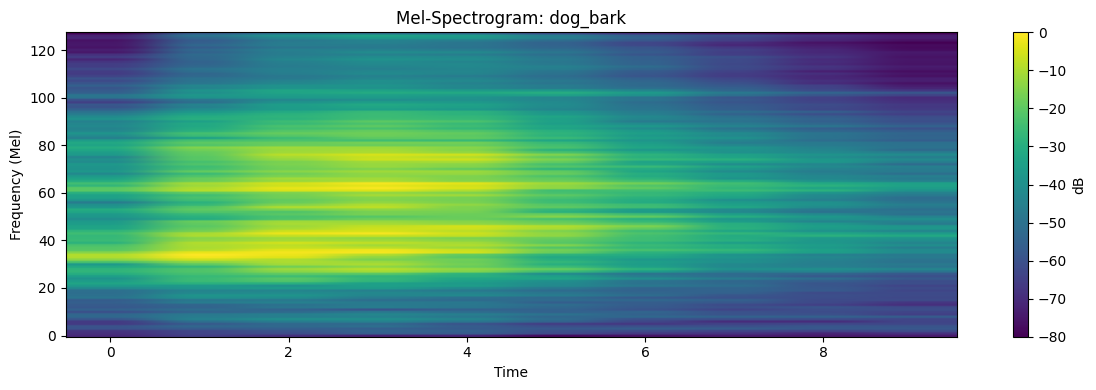

✅ Visualization complete!


In [90]:
print("="*60)
print("MEL-SPECTROGRAM EXTRACTION")
print("="*60)

# Create Mel-Spectrogram
mel_spec = librosa.feature.melspectrogram(
    y=audio,
    sr=sr,
    n_mels=128,
    n_fft=2048,
    hop_length=512
)

# Convert to log scale
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

print(f"\nMel-Spectrogram created!")
print(f"   Shape: {mel_spec_db.shape}")
print(f"   (128 frequency bands × {mel_spec_db.shape[1]} time steps)")

# Visualize
plt.figure(figsize=(12, 4))
plt.imshow(mel_spec_db, aspect='auto', origin='lower', cmap='viridis')
plt.colorbar(label='dB')
plt.title(f'Mel-Spectrogram: {class_name}')
plt.xlabel('Time')
plt.ylabel('Frequency (Mel)')
plt.tight_layout()
plt.show()

print("✅ Visualization complete!")


In [91]:
print("="*60)
print("CREATING PYTORCH DATASET")
print("="*60)

class UrbanSound8KDataset(Dataset):
    def __init__(self, metadata, dataset_path, sr=16000, n_mels=128, duration=4):
        self.metadata = metadata.reset_index(drop=True)
        self.dataset_path = dataset_path
        self.sr = sr
        self.n_mels = n_mels
        self.duration = duration

        # class name ↔ id mapping
        self.class_names = sorted(self.metadata["class"].unique())
        self.class_to_idx = {name: i for i, name in enumerate(self.class_names)}
        self.idx_to_class = {i: name for name, i in self.class_to_idx.items()}
        
        # Find audio directory
        self.audio_base = dataset_path
        if os.path.isdir(os.path.join(dataset_path, "audio")):
            self.audio_base = os.path.join(dataset_path, "audio")

    def __len__(self):
        return len(self.metadata)

    def __getitem__(self, idx):
        row = self.metadata.iloc[idx]

        # Build file path
        try:
            fold = int(row.get("fold", 1))
            filename = row["slice_file_name"]
            
            # Try to construct path
            file_path = None
            
            # Try pattern 1: audio/foldX/filename
            candidate = os.path.join(self.audio_base, f"fold{fold}", filename)
            if os.path.exists(candidate):
                file_path = candidate
            
            # Try pattern 2: foldX/filename
            if not file_path:
                candidate = os.path.join(self.dataset_path, f"fold{fold}", filename)
                if os.path.exists(candidate):
                    file_path = candidate
            
            # Try pattern 3: just filename in audio_base
            if not file_path:
                candidate = os.path.join(self.audio_base, filename)
                if os.path.exists(candidate):
                    file_path = candidate
            
            if not file_path:
                raise FileNotFoundError(f"Could not find audio file for {filename}")
            
            # Load audio
            audio, _ = librosa.load(file_path, sr=self.sr, duration=self.duration)

            # Pad/trim to fixed duration
            target_len = int(self.sr * self.duration)
            if len(audio) < target_len:
                audio = np.pad(audio, (0, target_len - len(audio)))
            else:
                audio = audio[:target_len]

            # Mel-spectrogram
            mel_spec = librosa.feature.melspectrogram(
                y=audio, sr=self.sr, n_mels=self.n_mels
            )
            mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
            mel_spec_db = (mel_spec_db + 40) / 40.0  # normalize

            label = self.class_to_idx[row["class"]]

            return torch.FloatTensor(mel_spec_db), label
        
        except Exception as e:
            print(f"Error loading index {idx}: {e}")
            # Return dummy data to avoid crash
            mel_spec_db = np.random.randn(128, 126)
            return torch.FloatTensor(mel_spec_db), 0

# Create dataset
dataset = UrbanSound8KDataset(metadata, dataset_path)
print(f"\nDataset created with {len(dataset)} samples")
print(f"Classes: {dataset.class_names}")

# Split train/test (80/20)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(
    dataset, [train_size, test_size]
)

print(f"Train samples: {len(train_dataset)}")
print(f"Test samples: {len(test_dataset)}")

# Create dataloaders
train_loader = DataLoader(
    train_dataset, batch_size=32, shuffle=True, num_workers=2
)
test_loader = DataLoader(
    test_dataset, batch_size=32, shuffle=False, num_workers=2
)

print(f"\nDataLoaders created!")
print(f"   Train batches: {len(train_loader)}")
print(f"   Test batches: {len(test_loader)}")

# Test one batch
for specs, labels in train_loader:
    print(f"\nSample batch loaded!")
    print(f"   Specs shape: {specs.shape}")
    print(f"   Labels shape: {labels.shape}")
    break


CREATING PYTORCH DATASET

✅ Dataset created with 8732 samples
✅ Classes: ['air_conditioner', 'car_horn', 'children_playing', 'dog_bark', 'drilling', 'engine_idling', 'gun_shot', 'jackhammer', 'siren', 'street_music']
✅ Train samples: 6985
✅ Test samples: 1747

✅ DataLoaders created!
   Train batches: 219
   Test batches: 55

✅ Sample batch loaded!
   Specs shape: torch.Size([32, 128, 126])
   Labels shape: torch.Size([32])


In [92]:
print("="*60)
print("DEFINING CNN MODEL")
print("="*60)

class AudioCNN(nn.Module):
    def __init__(self, num_classes=10):
        super(AudioCNN, self).__init__()
        
        # Convolutional blocks
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.pool1 = nn.MaxPool2d(2)
        
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.pool2 = nn.MaxPool2d(2)
        
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.pool3 = nn.MaxPool2d(2)
        
        # Dense layers
        self.flatten_size = 128 * 16 * 15
        self.dropout = nn.Dropout(0.5)
        self.fc1 = nn.Linear(self.flatten_size, 256)
        self.fc2 = nn.Linear(256, num_classes)
    
    def forward(self, x):
        # Add channel dimension if needed
        if len(x.shape) == 3:
            x = x.unsqueeze(1)
        
        # Conv block 1
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.pool1(x)
        
        # Conv block 2
        x = F.relu(self.bn2(self.conv2(x)))
        x = self.pool2(x)
        
        # Conv block 3
        x = F.relu(self.bn3(self.conv3(x)))
        x = self.pool3(x)
        
        # Flatten and dense
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        
        return x

# Create model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = AudioCNN(num_classes=len(dataset.class_names)).to(device)

# Count parameters
total_params = sum(p.numel() for p in model.parameters())

print(f"\nModel created!")
print(f"   Device: {device}")
print(f"   Total parameters: {total_params:,}")


DEFINING CNN MODEL

✅ Model created!
   Device: cuda
   Total parameters: 7,960,266


In [94]:
print("="*60)
print("SETUP OPTIMIZER & LOSS")
print("="*60)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='min', factor=0.5, patience=3
)

print(f"Loss function: CrossEntropyLoss")
print(f"Optimizer: Adam (lr=0.001)")
print(f"cheduler: ReduceLROnPlateau")


SETUP OPTIMIZER & LOSS
✅ Loss function: CrossEntropyLoss
✅ Optimizer: Adam (lr=0.001)
✅ Scheduler: ReduceLROnPlateau


In [95]:
print("="*60)
print("DEFINING TRAINING FUNCTIONS")
print("="*60)

def train_epoch(model, dataloader, criterion, optimizer, device):
    """Train for one epoch"""
    model.train()
    total_loss = 0
    correct = 0
    total = 0
    
    for specs, labels in dataloader:
        specs = specs.to(device)
        labels = labels.to(device)

        outputs = model(specs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)
    
    return total_loss / len(dataloader), correct / total

def validate(model, dataloader, criterion, device):
    """Validate model"""
    model.eval()
    total_loss = 0
    correct = 0
    total = 0
    
    with torch.no_grad():
        for specs, labels in dataloader:
            specs = specs.to(device)
            labels = labels.to(device)

            outputs = model(specs)
            loss = criterion(outputs, labels)

            total_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
    
    return total_loss / len(dataloader), correct / total

print("Training functions defined!")


DEFINING TRAINING FUNCTIONS
✅ Training functions defined!


In [96]:
print("="*60)
print("TRAINING MODEL")
print("="*60)

num_epochs = 15
train_losses = []
val_losses = []
train_accs = []
val_accs = []

for epoch in range(num_epochs):
    print(f"\n{'='*50}")
    print(f"Epoch {epoch+1}/{num_epochs}")
    print(f"{'='*50}")
    
    # Train
    train_loss, train_acc = train_epoch(
        model, train_loader, criterion, optimizer, device
    )
    
    # Validate
    val_loss, val_acc = validate(model, test_loader, criterion, device)
    
    # Step scheduler
    scheduler.step(val_loss)
    
    # Store metrics
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accs.append(train_acc)
    val_accs.append(val_acc)
    
    # Print progress
    print(f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc*100:.2f}%")
    print(f"Val Loss:   {val_loss:.4f} | Val Acc:   {val_acc*100:.2f}%")

print(f"\n{'='*50}")
print("✅ TRAINING COMPLETE!")
print(f"{'='*50}")


TRAINING MODEL

Epoch 1/15
Train Loss: 2.3324 | Train Acc: 31.17%
Val Loss:   1.4458 | Val Acc:   45.91%

Epoch 2/15
Train Loss: 1.5994 | Train Acc: 38.08%
Val Loss:   1.1324 | Val Acc:   59.82%

Epoch 3/15
Train Loss: 1.4264 | Train Acc: 44.95%
Val Loss:   0.9618 | Val Acc:   64.34%

Epoch 4/15
Train Loss: 1.2636 | Train Acc: 50.41%
Val Loss:   0.8959 | Val Acc:   69.89%

Epoch 5/15
Train Loss: 1.1394 | Train Acc: 55.88%
Val Loss:   0.8491 | Val Acc:   69.72%

Epoch 6/15
Train Loss: 1.0607 | Train Acc: 59.20%
Val Loss:   0.8688 | Val Acc:   71.95%

Epoch 7/15
Train Loss: 0.9757 | Train Acc: 63.41%
Val Loss:   0.6189 | Val Acc:   80.82%

Epoch 8/15
Train Loss: 0.8963 | Train Acc: 66.27%
Val Loss:   0.6439 | Val Acc:   78.99%

Epoch 9/15
Train Loss: 0.8360 | Train Acc: 68.59%
Val Loss:   0.5393 | Val Acc:   81.80%

Epoch 10/15
Train Loss: 0.7559 | Train Acc: 72.07%
Val Loss:   0.4904 | Val Acc:   83.51%

Epoch 11/15
Train Loss: 0.7121 | Train Acc: 72.93%
Val Loss:   0.4313 | Val Acc:   

PLOTTING RESULTS


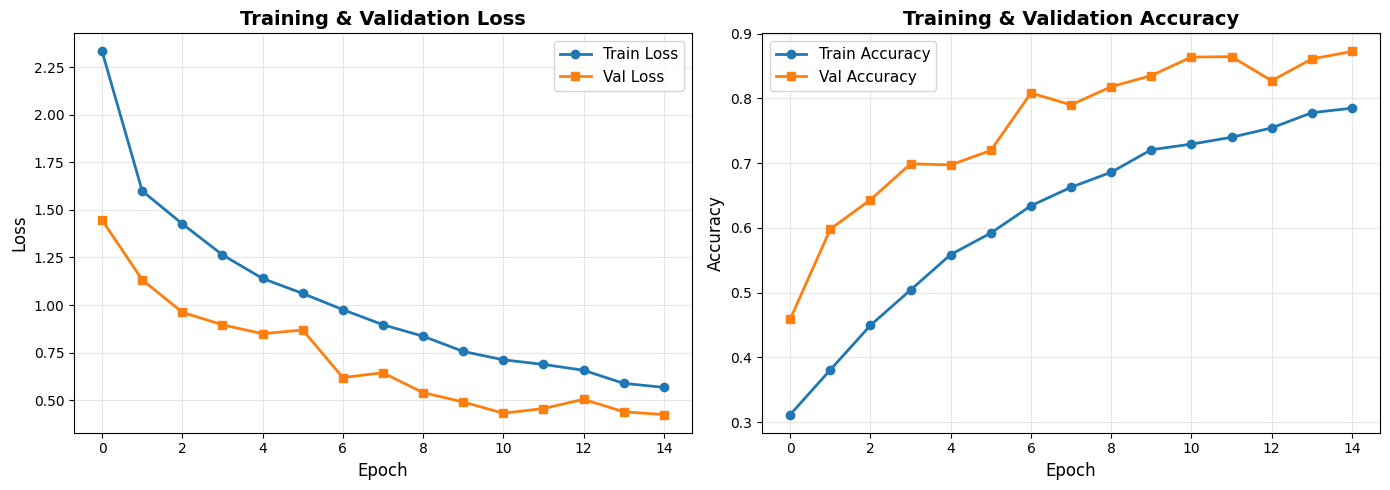


FINAL RESULTS:
   Train Accuracy: 78.48%
   Val Accuracy: 87.24%
   Best Val Accuracy: 87.24%


In [97]:
print("="*60)
print("PLOTTING RESULTS")
print("="*60)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Loss
axes[0].plot(train_losses, label='Train Loss', marker='o', linewidth=2)
axes[0].plot(val_losses, label='Val Loss', marker='s', linewidth=2)
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Loss', fontsize=12)
axes[0].set_title('Training & Validation Loss', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Accuracy
axes[1].plot(train_accs, label='Train Accuracy', marker='o', linewidth=2)
axes[1].plot(val_accs, label='Val Accuracy', marker='s', linewidth=2)
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('Accuracy', fontsize=12)
axes[1].set_title('Training & Validation Accuracy', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Final results
print(f"\nFINAL RESULTS:")
print(f"   Train Accuracy: {train_accs[-1]*100:.2f}%")
print(f"   Val Accuracy: {val_accs[-1]*100:.2f}%")
print(f"   Best Val Accuracy: {max(val_accs)*100:.2f}%")


In [98]:
print("="*60)
print("SAVING MODEL")
print("="*60)

import json

# Save model weights
model_path = '/kaggle/working/audio_model.pth'
torch.save(model.state_dict(), model_path)
print(f"Model saved to: {model_path}")

# Save metadata
metadata_dict = {
    'num_classes': len(dataset.idx_to_class),
    'idx_to_class': {str(k): v for k, v in dataset.idx_to_class.items()},
    'class_names': dataset.class_names
}

metadata_path = '/kaggle/working/model_metadata.json'
with open(metadata_path, 'w') as f:
    json.dump(metadata_dict, f, indent=2)
print(f"✅ Metadata saved to: {metadata_path}")

print(f"\n🎉 MODEL TRAINING COMPLETE AND SAVED!")


SAVING MODEL
Model saved to: /kaggle/working/audio_model.pth
✅ Metadata saved to: /kaggle/working/model_metadata.json

🎉 MODEL TRAINING COMPLETE AND SAVED!


In [99]:
print("="*60)
print("TESTING ON NEW AUDIO")
print("="*60)

# Get a random test sample
test_idx = np.random.randint(0, len(metadata))
test_row = metadata.iloc[test_idx]

fold = int(test_row.get('fold', 1))
filename = test_row['slice_file_name']
true_class = test_row['class']

# Build path
file_path = None
candidate = os.path.join(dataset_path, "audio", f"fold{fold}", filename)
if os.path.exists(candidate):
    file_path = candidate
else:
    candidate = os.path.join(dataset_path, f"fold{fold}", filename)
    if os.path.exists(candidate):
        file_path = candidate

if not file_path:
    print(f"Could not find test file")
else:
    print(f"Test file: {filename}")
    print(f"True class: {true_class}")
    
    # Load and process audio
    audio, sr = librosa.load(file_path, sr=16000, duration=4)
    target_length = int(sr * 4)
    if len(audio) < target_length:
        audio = np.pad(audio, (0, target_length - len(audio)))
    else:
        audio = audio[:target_length]
    
    # Create mel-spec
    mel_spec = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=128)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
    mel_spec_db = (mel_spec_db + 40) / 40
    
    # Predict
    spec_tensor = torch.FloatTensor(mel_spec_db).unsqueeze(0).unsqueeze(0).to(device)
    
    model.eval()
    with torch.no_grad():
        output = model(spec_tensor)
        probabilities = torch.softmax(output, dim=1)[0]
        predicted_idx = torch.argmax(probabilities).item()
    
    predicted_class = dataset.idx_to_class[predicted_idx]
    confidence = probabilities[predicted_idx].item()
    
    print(f"\nPREDICTION RESULTS:")
    print(f"   Predicted: {predicted_class}")
    print(f"   Confidence: {confidence*100:.2f}%")
    
    if predicted_class == true_class:
        print(f"   CORRECT!")
    else:
        print(f"   Wrong prediction")
    
    # Show all predictions
    print(f"\nAll predictions:")
    for idx in range(len(dataset.class_names)):
        class_name = dataset.idx_to_class[idx]
        prob = probabilities[idx].item()
        bar = "" * int(prob * 40)
        print(f"   {class_name:25s} {bar} {prob*100:6.2f}%")


TESTING ON NEW AUDIO
Test file: 115418-9-0-15.wav
True class: street_music

PREDICTION RESULTS:
   Predicted: street_music
   Confidence: 100.00%
   CORRECT!

All predictions:
   air_conditioner              0.00%
   car_horn                     0.00%
   children_playing             0.00%
   dog_bark                     0.00%
   drilling                     0.00%
   engine_idling                0.00%
   gun_shot                     0.00%
   jackhammer                   0.00%
   siren                        0.00%
   street_music               100.00%
